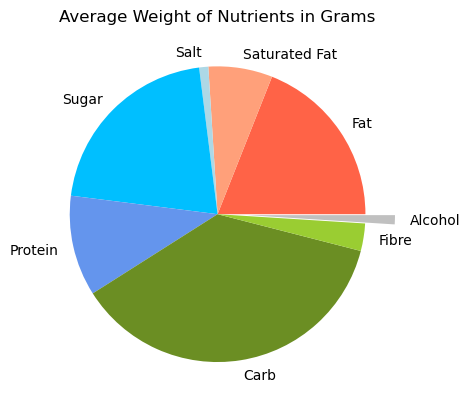

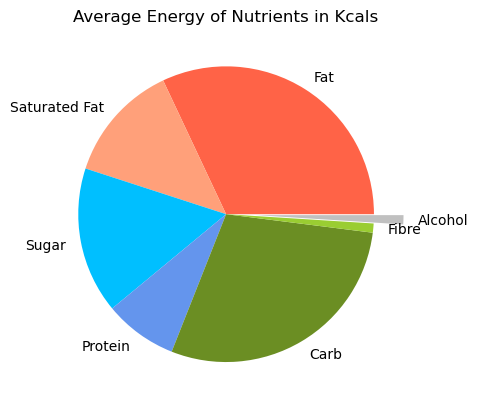

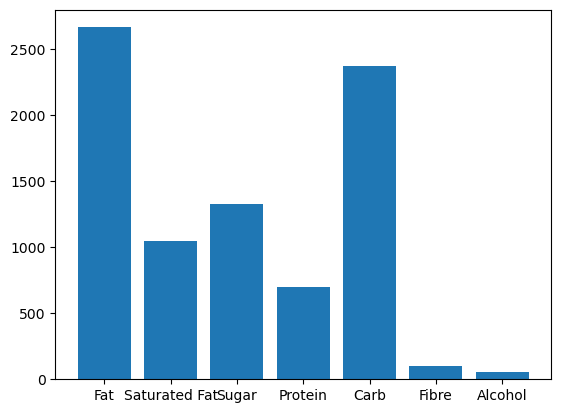

<BarContainer object of 8 artists>

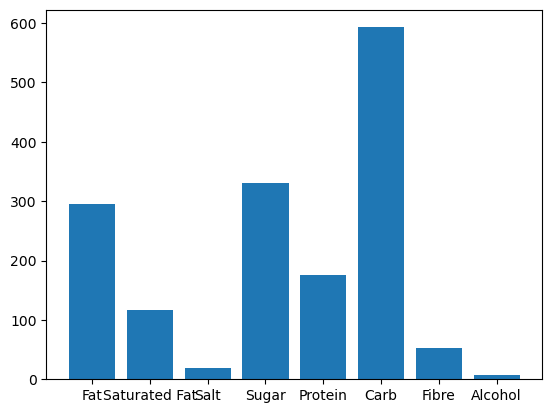

In [382]:
import csv
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import math

df = pd.read_csv('year_borough_grocery.csv')


nutrient = ['fat', 'saturate', 'salt', 'sugar', 'protein', 'carb', 'fibre', 'alcohol']
nutrient_mean = []
explode = [0, 0, 0, 0,0,0,0,0.2]

for i in nutrient:
    nutrient_mean.append(df[i].sum())

nutrient_mean_perc = np.rint(nutrient_mean/np.sum(nutrient_mean) * 100)
nutrient_label = ['Fat', 'Saturated Fat', 'Salt', 'Sugar', 'Protein', 'Carb', 'Fibre','Alcohol'] 
plt.pie(nutrient_mean_perc, labels = nutrient_label, explode = explode, colors = ['tomato', 'lightsalmon','lightblue','deepskyblue','cornflowerblue','olivedrab', 'yellowgreen', 'silver'])
plt.title('Average Weight of Nutrients in Grams')
plt.show()

energy = ['energy_fat', 'energy_saturate', 'energy_sugar', 'energy_protein', 'energy_carb', 'energy_fibre', 'energy_alcohol']
energy_mean = []

for i in energy:
    energy_mean.append(df[i].sum())

energy_mean_perc = np.rint(energy_mean/np.sum(energy_mean) * 100)
energy_label = ['Fat', 'Saturated Fat', 'Sugar', 'Protein', 'Carb', 'Fibre', 'Alcohol']
plt.pie(energy_mean_perc, labels = energy_label, colors = ['tomato', 'lightsalmon','deepskyblue','cornflowerblue','olivedrab', 'yellowgreen', 'silver'], explode = [0, 0, 0, 0,0,0,0.2])
plt.title('Average Energy of Nutrients in Kcals')
plt.show()

plt.bar(energy_label,energy_mean)
plt.show()
plt.bar(nutrient_label,nutrient_mean)

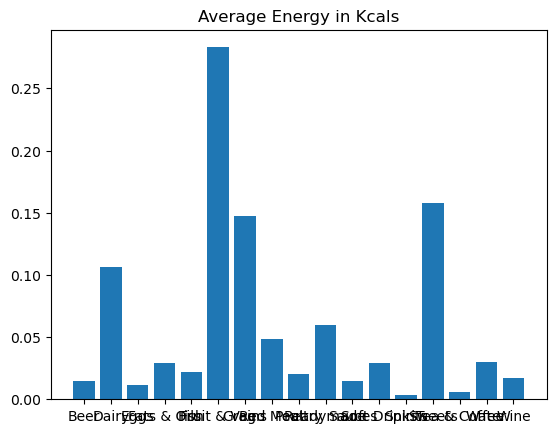

In [159]:
category = ['f_beer', 'f_dairy','f_eggs','f_fats_oils', 'f_fish', 'f_fruit_veg', 'f_grains', 'f_meat_red', 'f_poultry', 'f_readymade', 'f_sauces', 'f_soft_drinks', 'f_spirits', 'f_sweets', 'f_tea_coffee', 'f_water', 'f_wine']
category_mean = []

for i in category:
    category_mean.append(df[i].mean())

category_label = ['Beer', 'Dairy','Eggs','Fats & Oils', 'Fish', 'Fruit & Veg', 'Grains', 'Red Meat', 'Poultry', 'Readymade', 'Sauces', 'Soft Drinks', 'Spirits', 'Sweets', 'Tea & Coffee', 'Water', 'Wine']
plt.bar(category_label, category_mean)
plt.title('Average Energy in Kcals')
plt.show()

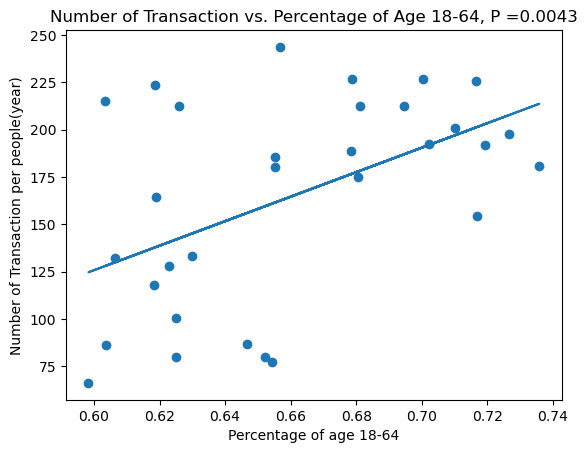

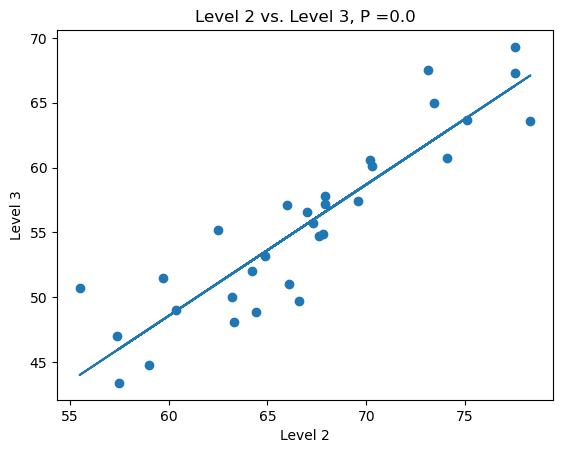

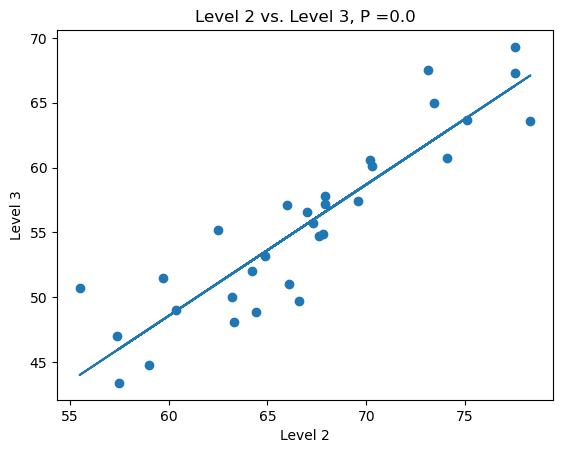

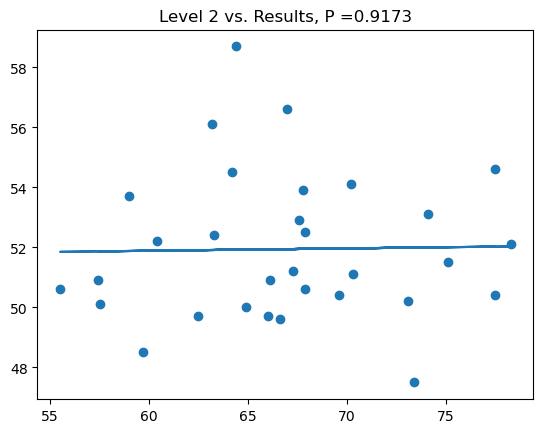

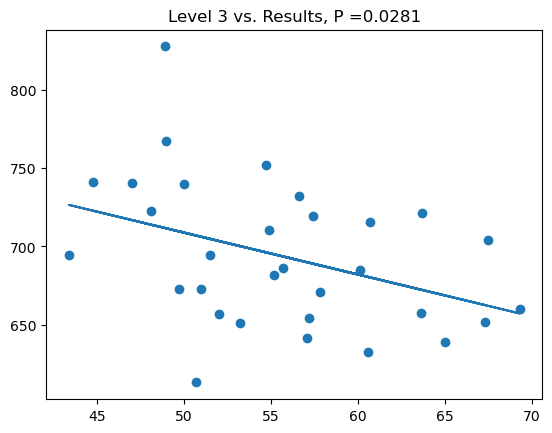

In [427]:
df = pd.read_csv('year_borough_grocery.csv')
df1 = pd.read_csv('Jul_borough_grocery.csv')
df2 = pd.read_csv('Aug_borough_grocery.csv')
df3 = pd.read_csv('Sep_borough_grocery.csv')
df4 = pd.read_csv('Oct_borough_grocery.csv')
df5 = pd.read_csv('Nov_borough_grocery.csv')
df6 = pd.read_csv('Dec_borough_grocery.csv')

df = df.drop([20,0])
df1 = df1.drop([20,0])
df2 = df2.drop([20,0])
df3 = df3.drop([20,0])
df4 = df4.drop([20,0])
df5 = df5.drop([20,0])
df6 = df6.drop([20,0])
                
plt.scatter(df['age_18_64_perc'], df['Transcation_per_people'])
plt.xlabel('Percentage of age 18-64')
plt.ylabel('Number of Transaction per people(year)')

slope, intercept, r, p, std_err = stats.linregress(df['age_18_64_perc'], df['Transcation_per_people'])
plt.plot( df['age_18_64_perc'], df['age_18_64_perc'] * slope + intercept)
plt.title('Number of Transaction vs. Percentage of Age 18-64, P =' + str(round(p, 4)))
plt.show()

plt.scatter(df['level2'], df['level3'])
plt.xlabel('Level 2')
plt.ylabel('Level 3')

slope, intercept, r, p, std_err = stats.linregress(df['level2'], df['level3'])
plt.plot( df['level2'], df['level2'] * slope + intercept)
plt.title('Level 2 vs. Level 3, P =' + str(round(p, 4)))
plt.show()

plt.scatter(df['level2'], df['level3'])
plt.xlabel('Level 2')
plt.ylabel('Level 3')

slope, intercept, r, p, std_err = stats.linregress(df['level2'], df['level3'])
plt.plot( df['level2'], df['level2'] * slope + intercept)
plt.title('Level 2 vs. Level 3, P =' + str(round(p, 4)))
plt.show()


slope, intercept, r, p, std_err = stats.linregress(df['level2'], df['gcse'])
plt.plot( df['level2'], df['level2'] * slope + intercept)
plt.scatter(df['level2'], df['gcse'])
plt.title('Level 2 vs. Results, P =' + str(round(p, 4)))
plt.show()


slope, intercept, r, p, std_err = stats.linregress(df['level3'], df['alevel'])
plt.plot( df['level3'], df['level3'] * slope + intercept)
plt.scatter(df['level3'], df['alevel'])
plt.title('Level 3 vs. Results, P =' + str(round(p, 4)))
plt.show()

In [413]:
def df_mean(i):
    # Return mean of 2015.01 - 2015.06

    mean = (df1[i] + df2[i] + df3[i] + df4[i] + df5[i] + df6[i]) / 6
    return mean

TypeError: 'function' object is not subscriptable

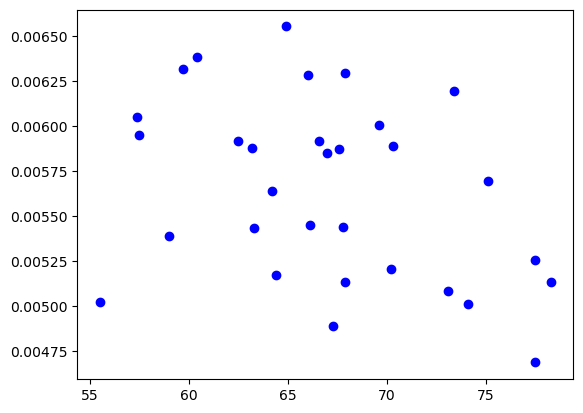

In [428]:
# test at confidence interval at 0.05 for level2 & 3 attainment

ci = 0.05

test = nutrient + energy + category + ['energy_tot', 'h_nutrients_weight',
                                       'h_nutrients_calories', 'energy_density',
                                       'weight', 'volume', 'h_items', 'h_items_weight']
result_both = []
result_2 = []
result_3 = []

for i in test:
    slope1, intercept1, r1, p1, std_err1 = stats.linregress(df['level2'], df_mean(i))
    slope2, intercept2, r2, p2, std_err2 = stats.linregress(df['level3'], df_mean(i))
    if p1 < ci and p2 < ci:
        plt.scatter(df['level2'], df_mean(i), color = 'b')
        plt.plot(df['level2'] , df['level2'] * slope1 + intercept1, color = 'b')
        plt.title(i + ' Level 2 p =' + str(round(p1, 4)))
        plt.show()
        plt.scatter(df['level3'], df_mean(i), color = 'orange')
        plt.plot(df['level3'] , df['level3'] * slope2 + intercept2, color = 'orange')
        plt.title(i + ' Level 3 p =' + str(round(p2, 4)))
        plt.show()
        item = [i, math.copysign(1,slope1), round(p1, 4), math.copysign(1,slope2), round(p2, 4)]
        result_both.append(item)
    else:
        if p1 < ci:
            plt.scatter(df['level2'], df_mean(i), color = 'b')
            plt.plot(df['level2'] , df_mean['level2'] * slope1 + intercept1, color = 'b')
            plt.title(i + ' Level 2 p =' + str(round(p1, 4)))
            plt.show()
            item = [i, math.copysign(1,slope1), round(p1, 4), math.copysign(1,slope2), round(p2, 4)]
            result_2.append(item)
        elif p2 < ci:
            plt.scatter(df['level3'], df_mean(i), color = 'orange')
            plt.plot(df['level3'] , df['level3'] * slope2 + intercept2, color = 'orange')
            plt.title(i + ' Level 3 p =' + str(round(p2, 4)))
            plt.show()
            item = [i, math.copysign(1,slope1), round(p1, 4), math.copysign(1,slope2), round(p2, 4)]
            result_3.append(item)

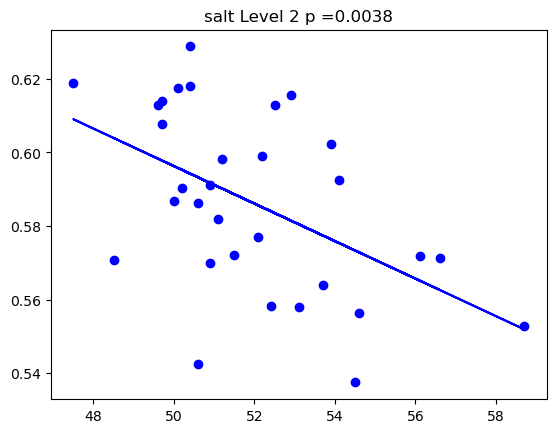

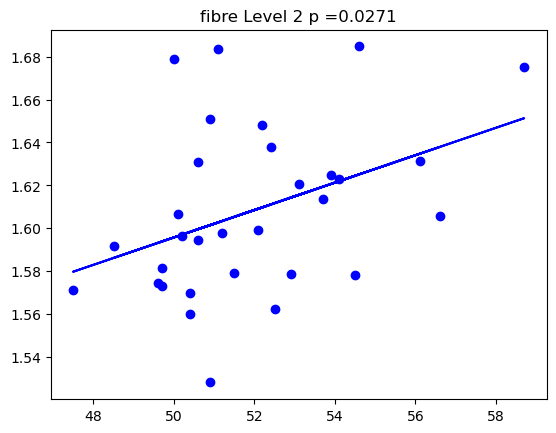

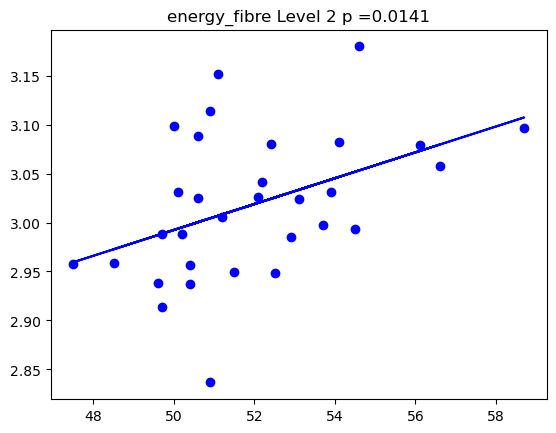

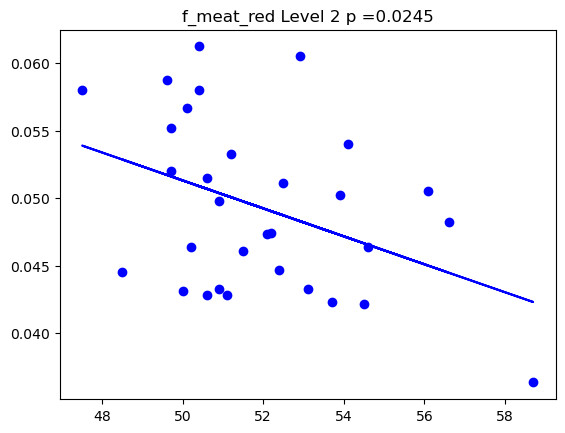

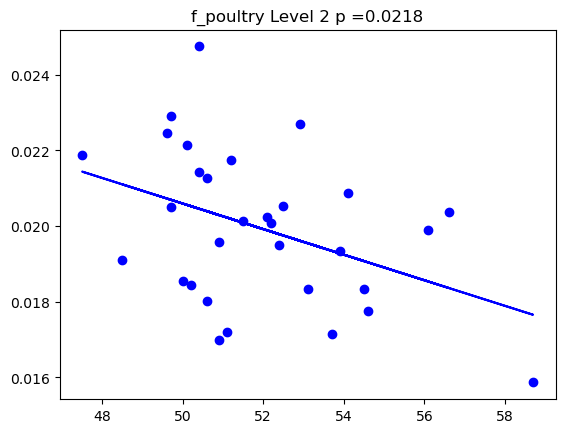

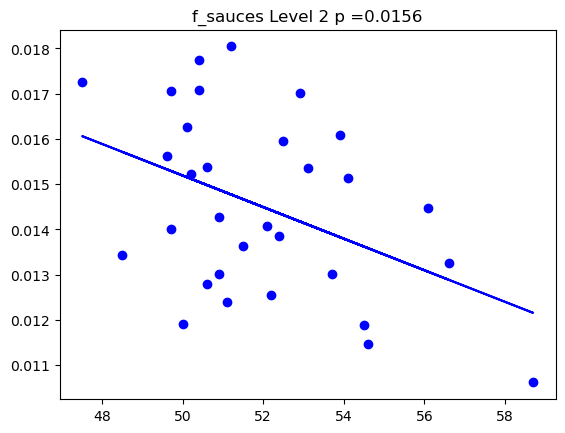

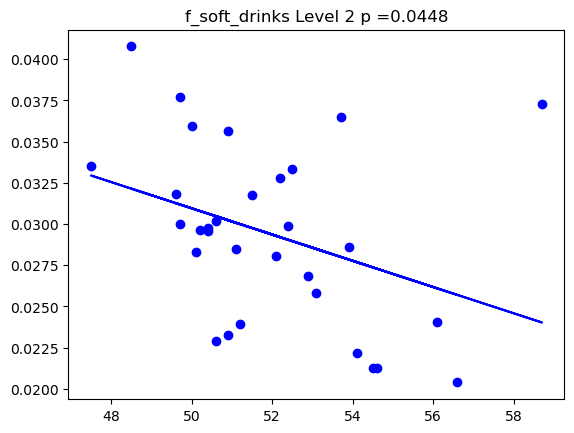

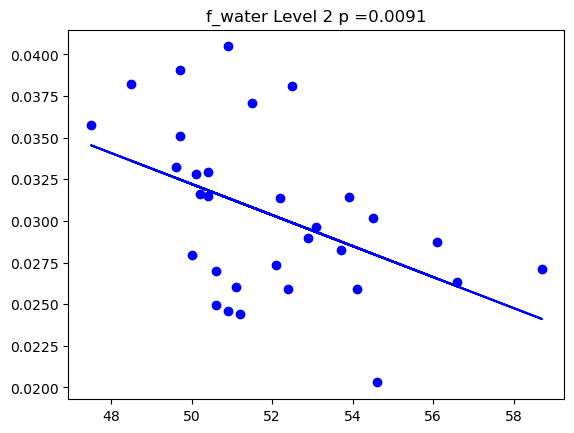

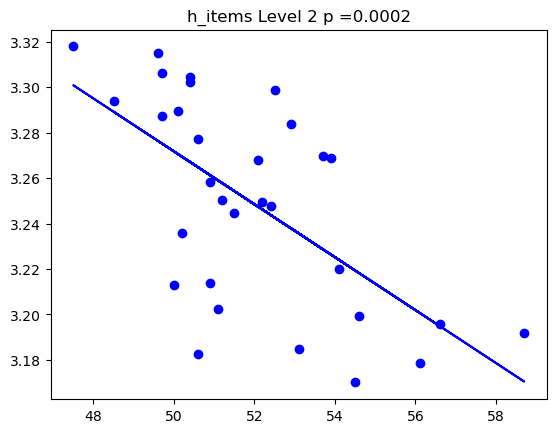

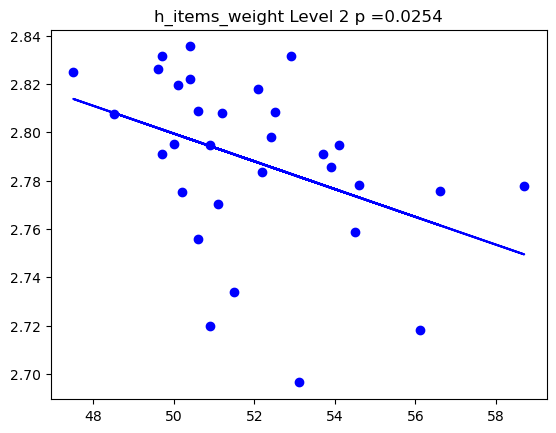

In [443]:
# test at confidence interval at 0.05 for gcse result

result_half = []

for i in test:
    slope, intercept, r, p, std_err = stats.linregress(df['gcse'], df_mean(i))
    if p < ci:
        plt.scatter(df['gcse'], df_mean(i), color = 'b')
        plt.plot(df['gcse'] , df['gcse'] * slope + intercept, color = 'b')
        plt.title(i + ' Level 2 p =' + str(round(p, 4)))
        plt.show()
        item = [i, math.copysign(1,slope), round(p, 4)]
        result_half.append(item)

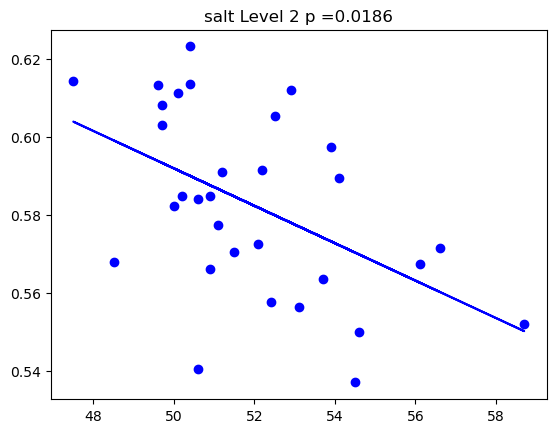

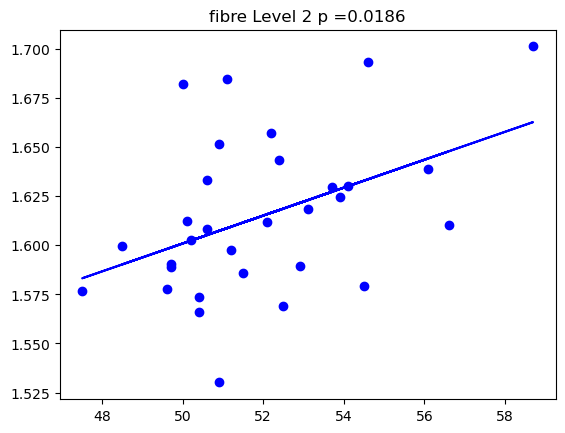

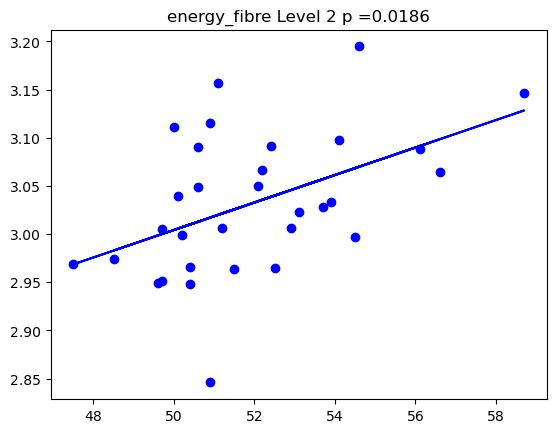

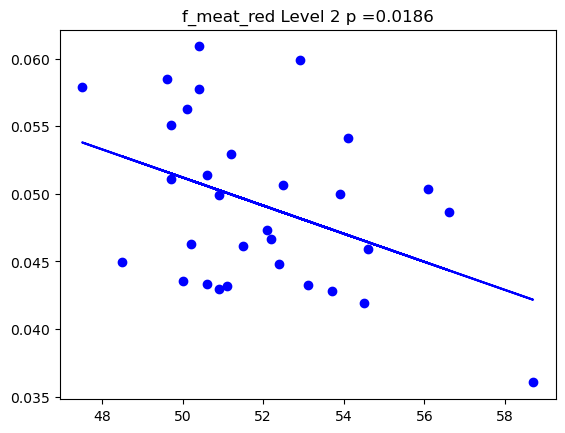

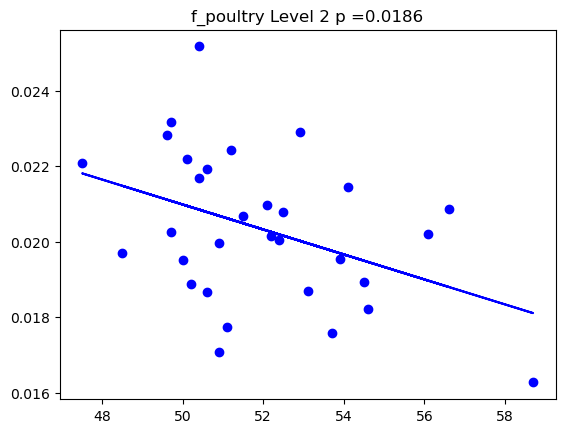

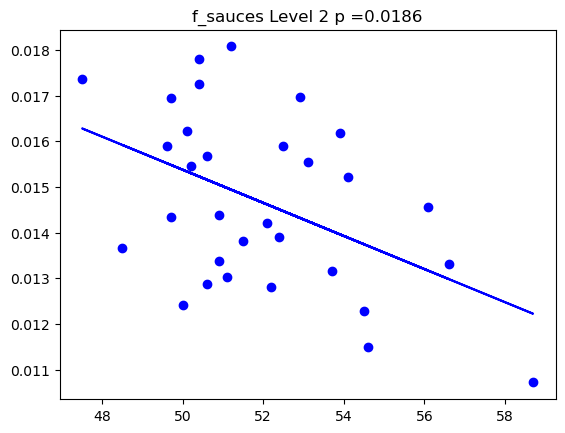

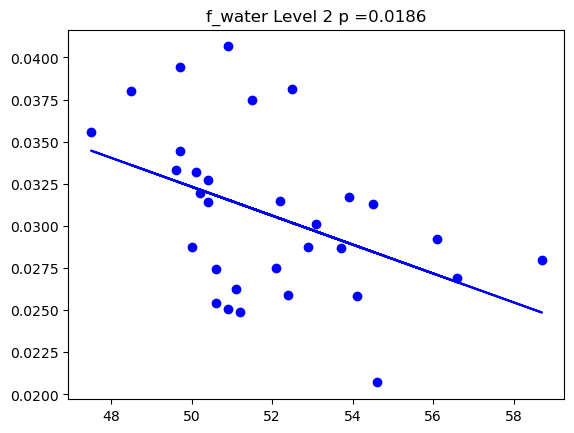

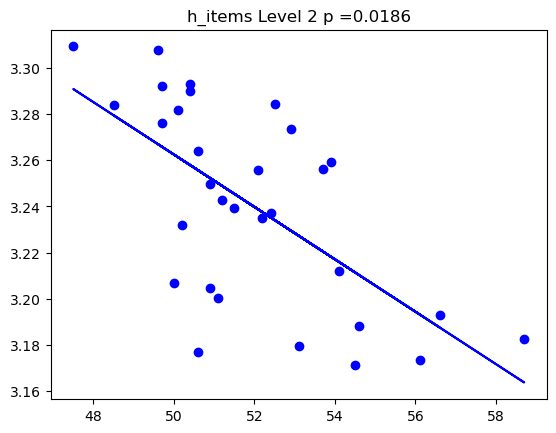

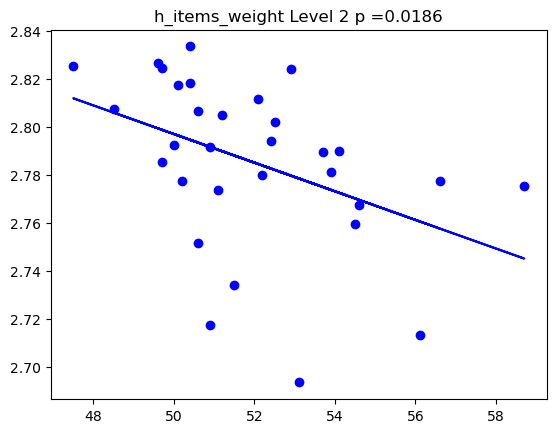

In [445]:
result_year = []

for i in test:
    slope, intercept, r, p, std_err = stats.linregress(df['gcse'], df[i])
    if p < ci:
        plt.scatter(df['gcse'], df[i], color = 'b')
        plt.plot(df['gcse'] , df['gcse'] * slope + intercept, color = 'b')
        plt.title(i + ' Level 2 p =' + str(round(p1, 4)))
        plt.show()
        item = [i, math.copysign(1,slope), round(p, 4)]
        result_year.append(item)

Text(0, 0.5, 'Fraction of Read Meat')

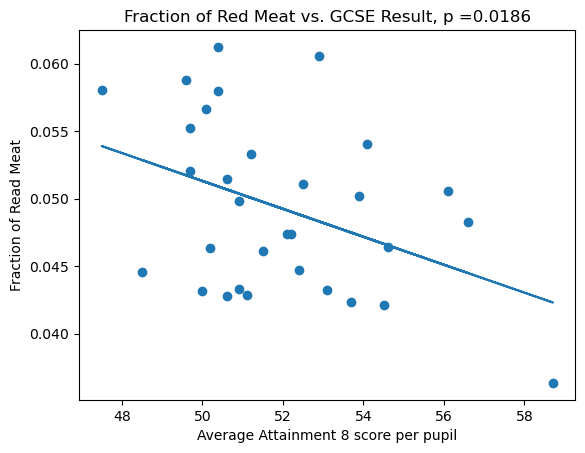

In [434]:

slope, intercept, r, p, std_err = stats.linregress(df['gcse'], df_mean('f_meat_red'))
plt.scatter(df['gcse'], df_mean('f_meat_red'))
plt.plot(df['gcse'] , df['gcse'] * slope + intercept)
plt.title('Fraction of Red Meat vs. GCSE Result, p =' + str(round(p1, 4)))
plt.xlabel('Average Attainment 8 score per pupil')
plt.ylabel('Fraction of Read Meat')

In [448]:
print('year:', result_year)
print('half:', result_half)
len(result_half)

year: [['salt', -1.0, 0.0044], ['fibre', 1.0, 0.0154], ['energy_fibre', 1.0, 0.0073], ['f_meat_red', -1.0, 0.0203], ['f_poultry', -1.0, 0.0226], ['f_sauces', -1.0, 0.0085], ['f_water', -1.0, 0.0142], ['h_items', -1.0, 0.0001], ['h_items_weight', -1.0, 0.0186]]
half: [['salt', -1.0, 0.0038], ['fibre', 1.0, 0.0271], ['energy_fibre', 1.0, 0.0141], ['f_meat_red', -1.0, 0.0245], ['f_poultry', -1.0, 0.0218], ['f_sauces', -1.0, 0.0156], ['f_soft_drinks', -1.0, 0.0448], ['f_water', -1.0, 0.0091], ['h_items', -1.0, 0.0002], ['h_items_weight', -1.0, 0.0254]]


10

In [365]:
result = []

for i in category:
    slope1, intercept1, r1, p1, std_err1 = stats.linregress(df2['level2'], df2[i])
    slope2, intercept2, r2, p2, std_err2 = stats.linregress(df2['level3'], df2[i])
    print(i, math.copysign(1,slope1), round(p1, 4), math.copysign(1,slope2), round(p2, 4))

f_beer -1.0 0.9504 -1.0 0.7779
f_dairy 1.0 0.5477 1.0 0.5213
f_eggs 1.0 0.2859 1.0 0.2715
f_fats_oils 1.0 0.1824 1.0 0.1587
f_fish 1.0 0.4875 1.0 0.1306
f_fruit_veg 1.0 0.7268 1.0 0.4338
f_grains -1.0 0.448 -1.0 0.1835
f_meat_red 1.0 0.3803 1.0 0.3145
f_poultry 1.0 0.5301 1.0 0.4744
f_readymade -1.0 0.2729 -1.0 0.1461
f_sauces 1.0 0.2461 1.0 0.1789
f_soft_drinks -1.0 0.4771 -1.0 0.3656
f_spirits 1.0 0.6728 1.0 0.8897
f_sweets -1.0 0.7358 -1.0 0.5252
f_tea_coffee -1.0 0.0455 -1.0 0.0891
f_water -1.0 0.9468 1.0 0.9481
f_wine -1.0 0.9189 1.0 0.907


\begin{equation}
\frac{\text{Attained}_{14-15} + \text{Attained}_{15-16}}{\text{Attained and Not Attained}_{14-16}}
\end{equation}
